<a href="https://colab.research.google.com/github/afairley/ColaboratoryNotebooks/blob/main/Jax101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import jax
import jax.numpy as jnp

x = jnp.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
x

Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [6]:
long_vector = jnp.arange(int(1e7))
%timeit jnp.dot(long_vector, long_vector).block_until_ready()

9.15 ms ± 1.88 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
def sum_of_squares(x):
  return jnp.sum(x**2)
sum_of_squares_dx = jax.grad(sum_of_squares)
x = jnp.asarray([1.0, 2.0, 3.0, 4.0])
print(sum_of_squares(x))
print(sum_of_squares_dx(x))


30.0
[2. 4. 6. 8.]


In [8]:
def sum_squared_error(x, y):
  return jnp.sum((x-y)**2)

sum_squared_error_dx = jax.grad(sum_squared_error)
y = jnp.asarray([1.1, 2.1, 3.1, 4.1])
print(sum_squared_error_dx(x,y))

[-0.20000005 -0.19999981 -0.19999981 -0.19999981]


In [9]:
jax.value_and_grad(sum_squared_error)(x, y)

(Array(0.03999995, dtype=float32),
 Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32))

In [10]:
def squared_error_with_aux(x, y):
  return sum_squared_error(x, y), x-y

jax.grad(squared_error_with_aux, has_aux=True)(x,y)

(Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32),
 Array([-0.10000002, -0.0999999 , -0.0999999 , -0.0999999 ], dtype=float32))

w: 3.01, b: -0.92


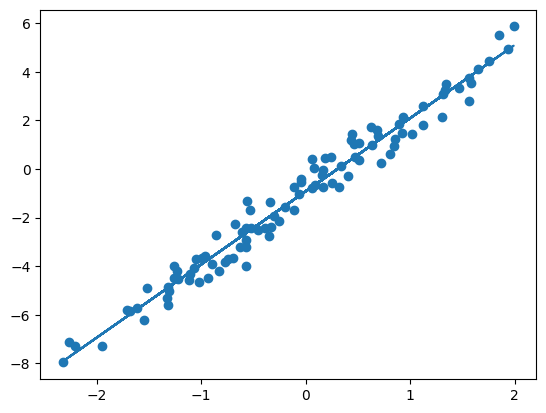

In [13]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = (xs * 3) - 1 +  5 * noise
plt.scatter(xs,ys)

def model(theta, x):
  """Computes wx + b on a batch of input x"""
  w, b = theta
  return (w * x) + b
def loss_fn(theta, x, y):
  """mean of the squared difference between the predicted result and actuality\
  """
  prediction = model(theta,x)
  return jnp.mean((prediction-y)**2)
def update(theta, x, y, learningRate=0.1):
  """Return a parameter vector updated by the learningRate times the
  gradient at theta"""
  return theta - learningRate * jax.grad(loss_fn)(theta, x, y)

theta = jnp.array([1., 1.])
TRAINING_ROUNDS = 1000

for i in range(TRAINING_ROUNDS):
  theta = update(theta, xs, ys)

plt.plot(xs, model(theta,xs))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")